In [ ]:
!pip install denoising_diffusion_pytorch
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.1/819.1 kB 18.2 MB/s eta 0:00:00


In [ ]:
from diffusion import VPSDE
import torchvision
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from denoising_diffusion_pytorch import Unet
from diffusion import VPSDE
from torch.utils.data import DataLoader
from torch.optim import Adam
from training import train_score_network_cifar
import torch

In [ ]:
device = 'cuda'
data = 'CIFAR10'
model = Unet(dim = 32).to(device)
model.load_state_dict(torch.load('cifarpretrain1'))
sde = VPSDE(100, 0.1, 20, device = device)

''' hyper params'''
n_epochs =   50
batch_size =  32
lr=1e-4
optimizer = Adam(model.parameters(), lr=lr)

In [ ]:
tfm = transforms.Compose([transforms.ToTensor()])
data = torchvision.datasets.CIFAR10(f'./data/', transform=tfm, download = True)
data_loader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=4)

100%|██████████| 170498071/170498071 [00:02<00:00, 84683008.78it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data/


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/content/diffusion.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = x - (drift - (diffusion**2)*score )*dt + diffusion * torch.sqrt(torch.tensor(dt)) * torch.randn_like(x)


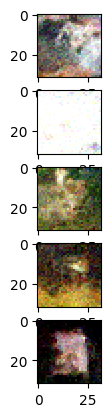

Epoch: 0 and Loss: 55.931602478027344
Epoch: 1 and Loss: 53.85978698730469
Epoch: 2 and Loss: 58.341705322265625
Epoch: 3 and Loss: 49.43288040161133
Epoch: 4 and Loss: 58.64771270751953
Epoch: 5 and Loss: 56.818485260009766
Epoch: 6 and Loss: 54.52183532714844
Epoch: 7 and Loss: 54.97235107421875
Epoch: 8 and Loss: 52.85990524291992
Epoch: 9 and Loss: 58.03349304199219


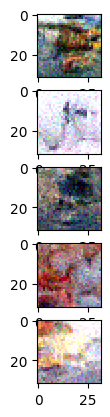

Epoch: 10 and Loss: 55.970252990722656
Epoch: 11 and Loss: 59.43206787109375
Epoch: 12 and Loss: 56.551090240478516
Epoch: 13 and Loss: 52.7393913269043
Epoch: 14 and Loss: 56.114994049072266
Epoch: 15 and Loss: 56.839019775390625
Epoch: 16 and Loss: 54.56409454345703
Epoch: 17 and Loss: 52.2744026184082
Epoch: 18 and Loss: 52.255252838134766
Epoch: 19 and Loss: 55.881229400634766


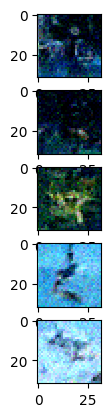

Epoch: 20 and Loss: 55.727901458740234
Epoch: 21 and Loss: 55.01057815551758
Epoch: 22 and Loss: 55.109012603759766
Epoch: 23 and Loss: 53.134742736816406
Epoch: 24 and Loss: 54.963279724121094
Epoch: 25 and Loss: 55.80164337158203
Epoch: 26 and Loss: 53.88410568237305
Epoch: 27 and Loss: 55.21388626098633
Epoch: 28 and Loss: 51.779876708984375
Epoch: 29 and Loss: 55.530860900878906


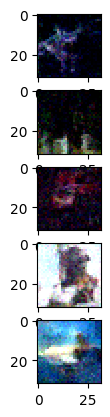

Epoch: 30 and Loss: 57.95021057128906
Epoch: 31 and Loss: 51.68974304199219
Epoch: 32 and Loss: 50.90263366699219
Epoch: 33 and Loss: 53.85054016113281
Epoch: 34 and Loss: 56.27375030517578
Epoch: 35 and Loss: 54.01826095581055
Epoch: 36 and Loss: 53.64204406738281
Epoch: 37 and Loss: 56.831485748291016
Epoch: 38 and Loss: 52.0864372253418
Epoch: 39 and Loss: 55.02366256713867


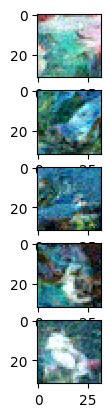

Epoch: 40 and Loss: 55.44904327392578
Epoch: 41 and Loss: 56.5682258605957
Epoch: 42 and Loss: 54.39479064941406
Epoch: 43 and Loss: 53.656158447265625
Epoch: 44 and Loss: 51.73420715332031


In [ ]:
train_score_network_cifar(data_loader, model, sde, optimizer, epochs=250)